We can also create `LQG` from a `cif`, using neighbor finding algorithm implemented in `pymatgen`.

(<Figure size 432x288 with 1 Axes>, None)

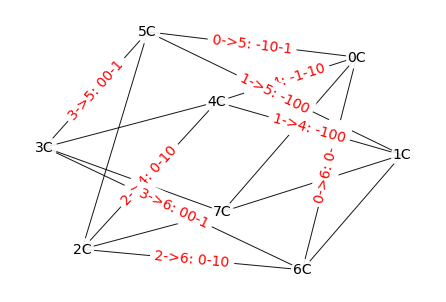

In [3]:
from crystalgraph import LQG
from pymatgen.core.structure import Structure
dia = Structure.from_file("dia.cif")
lqg = LQG.from_structure(dia)
lqg.draw("dia")

It was a graph of 8 nodes as the cubic unit cell contains 8 atoms. We can also start from a primitive cell.

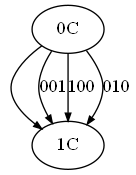

In [4]:
dia = Structure.from_file("dia_p.cif")
lqg = LQG.from_structure(dia)
lqg.draw_graphviz(ipython=True)  # use graphviz for parallel edges

We can also calculate its barycentric placement,
in this case it should be identical to the cif (upon translation).

In [5]:
structure = lqg.to_structure(dia.lattice, barycentric=True, barycentric_dim=3)
print(dia)
print(structure)

Full Formula (C2)
Reduced Formula: C
abc   :   2.526995   2.526995   2.526995
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  C     0.75  0.75  0.75
  1  C     0.5   0.5   0.5
Full Formula (C2)
Reduced Formula: C
abc   :   2.526995   2.526995   2.526995
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  C     -0     -0     -0
  1  C     -0.25  -0.25  -0.25


Now let's look at a more complex structure: the inorganic component in `ROBRIK`.

C:\Users\alexq\.conda\envs\cgtest\lib\site-packages\pygraphviz\agraph.py:1390: RuntimeWarning: Warning: pos attribute for edge (0,21) doesn't have 3n+1 points

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


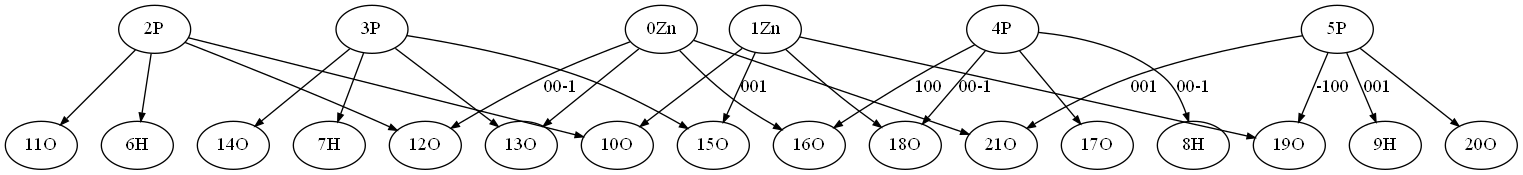

In [6]:
structure = Structure.from_file("ROBRIK_oxide.cif")
lqg = LQG.from_structure(structure)
lqg.draw_graphviz("robrik.png", ipython=True)

It is clear that this structure has several primary building units
(ZnO4 and PHO3), so we can apply contractions. The gray edges indicate corner-sharing between PBUs.

C:\Users\alexq\.conda\envs\cgtest\lib\site-packages\pygraphviz\agraph.py:1390: RuntimeWarning: Warning: pos attribute for edge (1-10-15-18-19,3-7-13-14-15) doesn't have 3n+1 points

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


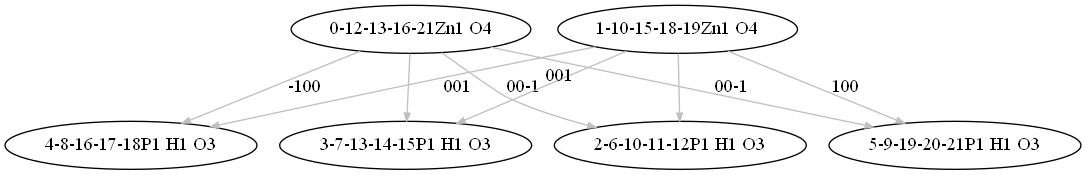

In [7]:
lqg_bu = lqg.bu_contraction()
lqg_bu.draw_graphviz("robrik.png", ipython=True)


A "nicer" fig can be generated if you only care about adjacency.

(<Figure size 432x288 with 1 Axes>,
 {'0-12-13-16-21': array([-0.13572044,  0.19911725]),
  '1-10-15-18-19': array([ 0.13560432, -0.19925802]),
  '2-6-10-11-12': array([-0.16277656, -0.99366188]),
  '3-7-13-14-15': array([-0.99888348, -0.01761821]),
  '4-8-16-17-18': array([1.        , 0.02017494]),
  '5-9-19-20-21': array([0.16177616, 0.99124593])})

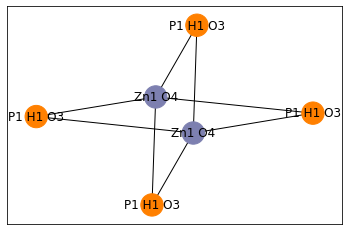

In [8]:
lqg_bu.to_uqg().draw("bu_uqg")